[[[ 21  30   0]
  [ 23  33   0]
  [ 26  36   2]
  ...
  [126  52  17]
  [133  54  21]
  [136  56  23]]

 [[ 21  30   0]
  [ 23  33   0]
  [ 26  36   1]
  ...
  [118  53  15]
  [124  54  18]
  [128  55  20]]

 [[ 21  32   0]
  [ 23  34   0]
  [ 26  38   2]
  ...
  [107  56  11]
  [111  57  13]
  [115  58  15]]

 ...

 [[ 50  63  10]
  [ 50  63  10]
  [ 49  62   9]
  ...
  [130   5  11]
  [133   7  11]
  [133   7  10]]

 [[ 53  66  10]
  [ 52  65   9]
  [ 51  66   9]
  ...
  [127   4   7]
  [129   3   7]
  [127   1   4]]

 [[ 53  68   9]
  [ 53  68   9]
  [ 53  68   9]
  ...
  [125   2   5]
  [127   1   5]
  [127   1   4]]]


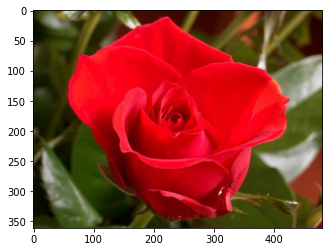

[[0.06666667 0.07058824 0.08235294 ... 0.25490196 0.27058824 0.27843137]
 [0.06666667 0.07058824 0.08235294 ... 0.24313725 0.25490196 0.2627451 ]
 [0.06666667 0.0745098  0.08627451 ... 0.22745098 0.23529412 0.24313725]
 ...
 [0.16078431 0.16078431 0.15686275 ... 0.18823529 0.19607843 0.19607843]
 [0.16862745 0.16470588 0.16470588 ... 0.18039216 0.18039216 0.17254902]
 [0.16862745 0.16862745 0.16862745 ... 0.17254902 0.17254902 0.17254902]]


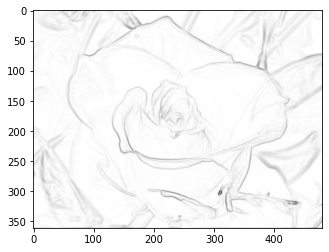

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from math import sqrt
import time

class sobel_edge_detector:
    def __init__(self, path= None, img= None):
        if path != None:
            self.image = mpimg.imread(path)
        else:
            self.image = img
        self.orig_img = self.image
        self.vertical_grad_filter = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
        self.horizontal_grad_filter = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
        print(self.image)

    def cvt2gray(self):
        self.image = np.dot(self.image, [1, 1, 1])//3
        self.image = self.image/255
        print(self.image)

    def detect_edges(self):
        self.cvt2gray()
        kernel_width = self.vertical_grad_filter.shape[0]//2
        grad_ = np.zeros(self.image.shape)

        self.image = np.pad(self.image, pad_width= ([kernel_width, ], [kernel_width, ]), 
        mode= 'constant', constant_values= (0, 0))
        for i in range(kernel_width, self.image.shape[0] - kernel_width):
            for j in range(kernel_width, self.image.shape[1] - kernel_width):
                x = self.image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * self.vertical_grad_filter.flatten()
                sum_x = x.sum()

                y = self.image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * self.horizontal_grad_filter.flatten()
                sum_y = y.sum()
        
                grad_[i - kernel_width][j - kernel_width] = sqrt(sum_x**2 + sum_y**2)
        self.image = grad_
        return self.image
        # loc_time = time.localtime(time.time())
        # m = str(loc_time.tm_year) + str(loc_time.tm_mon) + str(loc_time.tm_mday) + str(loc_time.tm_hour) + str(loc_time.tm_min) + str(loc_time.tm_sec)
        # img_save_name = 'sobel_edge_det_' + m + ".jpg"
        # plt.imsave(img_save_name, self.image)

    def show_image(self, orig = 0):
        if orig == 1:
            plt.imshow(self.orig_img)
            plt.show()
        if orig == 0:
            for i in range(len(self.image)):
                for j in range(len(self.image[0])):
                    self.image[i][j] = 1 - self.image[i][j] 
            plt.imshow(self.image, cmap= 'gray')
            plt.show()


if __name__ == "__main__":
    img = sobel_edge_detector("test.jpg")
    img.show_image(1)
    img.detect_edges()
    img.show_image()
    
